In [1]:
%matplotlib inline

In [2]:
path="data/dogscats/sample/"

In [3]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [4]:
import utils;reload(utils)
from utils import plots

Using TensorFlow backend.


In [5]:
import vgg16;reload(vgg16)
from vgg16 import Vgg16

In [16]:
#Vgg16 model showing how to use the class to view imagenet predictions with different categories.
vgg = Vgg16()
batches = vgg.get_batches(path+'train',batch_size=4)

Found 16 images belonging to 2 classes.


In [12]:
next(batches)

(array([[[[ 114.,  107.,   97., ...,  220.,  223.,  217.],
          [ 107.,  106.,  105., ...,  215.,  221.,  221.],
          [ 106.,  108.,  111., ...,  215.,  219.,  224.],
          ..., 
          [ 107.,  101.,  111., ...,  140.,  136.,  135.],
          [ 114.,  109.,  111., ...,  135.,  138.,  133.],
          [ 114.,  109.,  111., ...,  122.,  134.,  132.]],
 
         [[ 116.,  109.,   99., ...,  220.,  223.,  217.],
          [ 109.,  108.,  107., ...,  216.,  222.,  222.],
          [ 108.,  110.,  113., ...,  216.,  221.,  226.],
          ..., 
          [ 111.,  105.,  116., ...,  123.,  123.,  122.],
          [ 119.,  114.,  115., ...,  113.,  127.,  122.],
          [ 119.,  114.,  115., ...,  100.,  123.,  121.]],
 
         [[ 102.,   95.,   85., ...,  222.,  233.,  227.],
          [  95.,   94.,   93., ...,  218.,  226.,  226.],
          [  94.,   96.,   99., ...,  218.,  220.,  225.],
          ..., 
          [  97.,   88.,   93., ...,  131.,  132.,  131.],
  

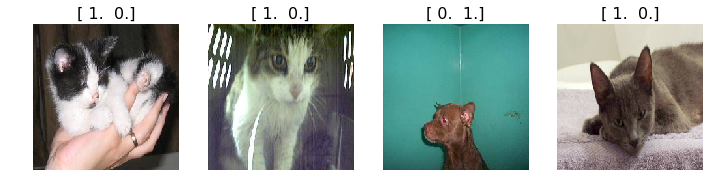

In [13]:
img,labels = next(batches)
plots(img,titles=labels)

In [14]:
vgg.predict(img,True)

(array([ 0.3318,  0.2375,  0.1499,  0.6252], dtype=float32),
 array([377, 355, 736, 178]),
 [u'marmoset', u'llama', u'pool_table', u'Weimaraner'])

In [17]:
#Vgg class to finetune a model according to your data classification.
batch_size = 64
batches = vgg.get_batches(path+'train',batch_size=batch_size)
val_batch = vgg.get_batches(path+'valid',batch_size=batch_size)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [18]:
vgg.finetune(batches)


In [22]:
vgg.fit(batches,val_batch,nb_epoch=1)


Epoch 1/1
16/16 [==============================] - 71s - loss: 0.7443 - acc: 0.6250 - val_loss: 0.5687 - val_acc: 0.8750
